# Imports

In [1]:
import copy
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import ScalarFormatter

import numpy as np
import pandas as pd
import pickle as pkl
import re
from scipy.stats import spearmanr, pearsonr, rankdata

from sklearn import linear_model
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
import torch.nn.functional as F
import torch.optim as optim
import xgboost

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%load_ext autoreload
%autoreload 2


np.set_printoptions(linewidth=150)
pd.options.display.max_columns = 500
pd.options.mode.chained_assignment = None

from graph2net.parser import parse
from graph2net.helpers import top_n

# : Extract Micros of Given Configuration

In [2]:
run_stats=parse()

In [3]:
run_stats.iloc[-50:-1]

auxiliaries auxillaries  \
4693           [2]         NaN   
4694           [2]         NaN   
4695           [2]         NaN   
4696           [2]         NaN   
4697           [2]         NaN   
4698           [2]         NaN   
4699           [2]         NaN   
4700           [2]         NaN   
4701           [2]         NaN   
4702           [2]         NaN   
4703           [2]         NaN   
4704           [2]         NaN   
4705           [2]         NaN   
4706           [2]         NaN   
4707           [2]         NaN   
4708           [2]         NaN   
4709           [2]         NaN   
4710           [2]         NaN   
4711           [2]         NaN   
4712  [1, 2, 3, 4]         NaN   
4713  [1, 2, 3, 4]         NaN   
4714  [1, 2, 3, 4]         NaN   
4715        [None]         NaN   
4716        [None]         NaN   
4717           [2]         NaN   
4718        [None]         NaN   
4719        [None]         NaN   
4720           [2]         NaN   
4721           [2]         NaN   
4722           [2]         NaN   
4723           [2]         NaN   
4724           [2]         NaN   
4725        [None]         NaN   
4726        [None]         NaN   
4727        [None]         NaN   
4728        [None]         NaN   
4729        [None]         NaN   
4730           [2]         NaN   
4731        [None]         NaN   
4732        [None]         NaN   
4733        [None]         NaN   
4734  [1, 2, 3, 4]         NaN   
4735        [None]         NaN   
4736        [None]         NaN   
4737  [1, 2, 3, 4]         NaN   
4738        [None]         NaN   
4739        [None]         NaN   
4740  [1, 2, 3, 4]         NaN   
4741        [None]         NaN   

                                          cell_matrices  \
4693  [[[0, 3, 0, 1], [0, 0, 13, 0], [0, 0, 0, 2], [...   
4694  [[[0, 3, 0, 1], [0, 0, 13, 0], [0, 0, 0, 2], [...   
4695  [[[0, 3, 0, 1], [0, 0, 13, 0], [0, 0, 0, 2], [...   
4696  [[[0, 3, 0, 1], [0, 0, 13, 0], [0, 0, 0, 2], [...   
4697  [[[0, 3, 0, 1], [0, 0, 13, 0], [0, 0, 0, 2], [...   
4698  [[[0, 3, 0, 1], [0, 0, 13, 0], [0, 0, 0, 2], [...   
4699  [[[0, 3, 0, 1], [0, 0, 13, 0], [0, 0, 0, 2], [...   
4700  [[[0, 3, 0, 1], [0, 0, 13, 0], [0, 0, 0, 2], [...   
4701  [[[0, 3, 0, 1], [0, 0, 13, 0], [0, 0, 0, 2], [...   
4702  [[[0, 3, 0, 1], [0, 0, 13, 0], [0, 0, 0, 2], [...   
4703  [[[0, 3, 0, 1], [0, 0, 13, 0], [0, 0, 0, 2], [...   
4704  [[[0, 3, 0, 1], [0, 0, 13, 0], [0, 0, 0, 2], [...   
4705  [[[0, 3, 0, 1], [0, 0, 13, 0], [0, 0, 0, 2], [...   
4706  [[[0, 3, 0, 1], [0, 0, 13, 0], [0, 0, 0, 2], [...   
4707  [[[0, 3, 0, 1], [0, 0, 13, 0], [0, 0, 0, 2], [...   
4708  [[[0, 3, 0, 1], [0, 0, 13, 0], [0, 0, 0, 2], [...   
4709  [[[0, 3, 0, 1], [0, 0, 13, 0], [0, 0, 0, 2], [...   
4710  [[[0, 3, 0, 1], [0, 0, 13, 0], [0, 0, 0, 2], [...   
4711  [[[0, 3, 0, 1], [0, 0, 13, 0], [0, 0, 0, 2], [...   
4712  [[[0, 3, 0, 1], [0, 0, 13, 0], [0, 0, 0, 2], [...   
4713  [[[0, 3, 0, 1], [0, 0, 13, 0], [0, 0, 0, 2], [...   
4714  [[[0, 3, 0, 1], [0, 0, 13, 0], [0, 0, 0, 2], [...   
4715  [[[0.0, 5.0, 0.0, 1.0, 0.0, 0.0, 0.0], [1.0, 0...   
4716  [[[0.0, 5.0, 0.0, 1.0, 0.0, 0.0, 0.0], [1.0, 0...   
4717  [[[0.0, 5.0, 0.0, 1.0, 0.0, 0.0, 0.0], [1.0, 0...   
4718  [[[0.0, 1.0, 1.0, 0.0], [0.0, 0.0, 0.0, 1.0], ...   
4719  [[[0.0, 14.0, 14.0, 0.0, 9.0, 1.0], [0.0, 0.0,...   
4720  [[[0.0, 5.0, 5.0, 0.0, 4.0, 0.0, 1.0, 0.0, 0.0...   
4721  [[[0.0, 1.0, 5.0, 0.0, 14.0, 12.0, 0.0, 0.0], ...   
4722  [[[0.0, 4.0, 0.0, 1.0, 0.0, 0.0], [1.0, 0.0, 1...   
4723  [[[0.0, 1.0, 1.0, 1.0, 14.0], [1.0, 0.0, 0.0, ...   
4724  [[[0.0, 1.0, 12.0, 1.0, 7.0, 0.0], [0.0, 0.0, ...   
4725  [[[0.0, 1.0, 1.0, 0.0], [0.0, 0.0, 0.0, 1.0], ...   
4726  [[[0.0, 1.0, 1.0, 0.0], [0.0, 0.0, 0.0, 1.0], ...   
4727  [[[0.0, 1.0, 9.0, 0.0, 1.0, 11.0, 0.0, 0.0], [...   
4728  [[[0.0, 10.0, 8.0, 0.0], [1.0, 0.0, 15.0, 0.0]...   
4729  [[[0.0, 10.0, 8.0, 0.0], [1.0, 0.0, 15.0, 0.0]...   
4730  [[[0.0, 10.0, 8.0, 0.0], [1.0, 0.0, 15.0, 0.0]...   
4731 

In [4]:
def get_micros(reductions,epochs,name):
    matrices = {}
    for idx,row in run_stats.iterrows():
        if row['epoch']==0:
            continue
        if not type(row['cell_matrices'])==float:
            if len(row['cell_matrices'])<3:
                cell_matrix = np.array(row['cell_matrices'][0])
            else:
                cell_matrix = np.array(row['cell_matrices'])
            
            if matrices.get(cell_matrix.tobytes()) is None:
                matrices[cell_matrix.tobytes()] = []
            matrices[cell_matrix.tobytes()].append(row)
    matrix_dfs = [pd.DataFrame(matrices[x]) for x in matrices.keys()]

    pairs = []
    macro_cells = []
    matrix_id=0

    no_micro,no_macro = 0,0
    for matrix_df_idx,matrix_df in enumerate(matrix_dfs):           
        micro_scores,macro_scores = [],[]
        micro_stats,macro_stats = [],[]
        micro,macro=False,False

        cell_counts = []
        for idx,row in matrix_df.iterrows():
            if len(row['cell_types'])==reductions and len(row['curve'])>=epochs and row['scale']==2:
                micro_scores.append(max(row['curve'][:epochs]))
                micro_stats.append(dict(("micro_"+k,v) for (k,v) in row.items()))
                micro=True
            
            elif sum(row['cell_types'])==5 and len(row['curve'])>=127:
                macro_scores.append(max(row['curve'][:128]))
                macro_stats.append(dict(("macro_"+k,v) for (k,v) in row.items()))
                macro=True
        if macro:
            macro_cells.append(macro_stats[0]['macro_cell_matrices'])
        if macro and not micro:
            no_micro +=1
        if micro and not macro:
            no_macro +=1
        if micro and macro:
            matrix_id+=1
            micro_score = np.mean(micro_scores)
            macro_score = np.mean(macro_scores)
            for i,micro_score in enumerate(micro_scores):
                for j,macro_score in enumerate(macro_scores):
                    pair_dict = {"_micro_score":micro_score,"_macro_score":macro_score,"matrix_id":matrix_id}
                    pair_dict.update(micro_stats[i])
                    pair_dict.update(macro_stats[j])
                    pairs.append(pair_dict)

    pkl.dump(macro_cells,open('pickle_jar/all_macro_cells.pkl','wb'))
    pair_df = pd.DataFrame(pairs)
    
    print("=== {} ===".format(name))
    print("Missing Micro_{} Runs: {}, Missing Macro Runs: {}".format(name,no_micro,no_macro))
    print("Number of Micro_{} Test Pairs: {}".format(name,len(pair_df['matrix_id'].unique())))
    print()
    
    return pair_df

In [5]:
dfs,pp_dfs,p_dfs,d_dfs = {},{},{},{}

def namer(r,e):
    return "r{}_e{}".format(r,e)

# process candidate micro conditions
matrix_id_set = set()
for r,e in [(2,8),(2,32),(5,8)]:
    name = namer(r,e)
    dfs[name]  = get_micros(reductions=r,epochs=e, name=name)
    matrix_id_set.update(dfs[name]['matrix_id'].unique())

=== r2_e8 ===
Missing Micro_r2_e8 Runs: 0, Missing Macro Runs: 616
Number of Micro_r2_e8 Test Pairs: 84

=== r2_e32 ===
Missing Micro_r2_e32 Runs: 1, Missing Macro Runs: 31
Number of Micro_r2_e32 Test Pairs: 83

=== r5_e8 ===
Missing Micro_r5_e8 Runs: 1, Missing Macro Runs: 32
Number of Micro_r5_e8 Test Pairs: 83



In [65]:
def spread(l):
    return [item for item in l for i in range(4)]

test_df = dfs['r2_e8']
test_df[test_df['_micro_score'].apply(lambda x: 5200>x>5100)].sort_values(by="_micro_score")

_macro_score  _micro_score macro_auxiliaries macro_auxillaries  \
384          7355          5111               NaN               [2]   
403          7936          5133               NaN               [2]   
373          8833          5139               NaN               [2]   
170          6385          5139               NaN               NaN   
171          6531          5139               NaN               NaN   
172          6857          5139               NaN               NaN   
173          8212          5139               [2]               NaN   
379          5515          5145               NaN               [2]   
211          7579          5149               NaN               NaN   
214          7259          5157               NaN               NaN   
392          8552          5161               NaN               [2]   
352          8669          5167               NaN               [2]   
381          7927          5169               NaN               [2]   
146          3431          5177               NaN               NaN   
147          7376          5177               NaN               NaN   
169          8212          5185               [2]               NaN   
168          6857          5185               NaN               NaN   
167          6531          5185               NaN               NaN   
166          6385          5185               NaN               NaN   
282          9115          5187               [2]               NaN   
283          9160          5187               NaN               [2]   
284          9288          5187               [2]               NaN   
285          9346          5187               [2]               NaN   
286          9278          5187               NaN               NaN   
287          9268          5187               NaN               NaN   
288          9101          5187               NaN               NaN   
280          9227          5187               [2]               NaN   
281          9207          5187               [2]               NaN   

                                   macro_cell_matrices  \
384  [[[0.0, 14.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....   
403  [[[0.0, 1.0, 1.0, 15.0, 0.0, 0.0, 8.0], [1.0, ...   
373  [[[0.0, 1.0, 1.0, 9.0, 0.0, 15.0, 0.0, 0.0, 0....   
170  [[[0, 11, 11, 5, 11], [1, 0, 0, 0, 13], [1, 0,...   
171  [[[0, 11, 11, 5, 11], [1, 0, 0, 0, 13], [1, 0,...   
172  [[[0, 11, 11, 5, 11], [1, 0, 0, 0, 13], [1, 0,...   
173  [[[0, 11, 11, 5, 11], [1, 0, 0, 0, 13], [1, 0,...   
379  [[[0.0, 1.0, 1.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0...   
211  [[[0.0, 12.0, 13.0], [1.0, 0.0, 1.0], [1.0, 0....   
214  [[[0.0, 1.0, 6.0, 0.0, 0.0], [1.0, 0.0, 0.0, 1...   
392  [[[0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 14.0, 1.0, 0....   
352  [[[0.0, 15.0, 1.0, 0.0, 12.0, 0.0, 4.0], [1.0,...   
381  [[[0.0, 1.0, 10.0, 0.0, 0.0, 0.0, 0.0], [0.0, ...   
146  [[[1, 11, 11, 5, 11], [1, 0, 0, 0, 13], [1, 0,...   
147  [[[1, 11, 11, 5, 11], [1, 0, 0, 0, 13], [1, 0,...   
169  [[[0, 11, 11, 5, 11], [1, 0, 0, 0, 13], [1, 0,...   
168  [[[0, 11, 11, 5, 11], [1, 0, 0, 0, 13], [1, 0,...   
167  [[[0, 11, 11, 5, 11], [1, 0, 0, 0, 13], [1, 0,...   
166  [[[0, 11, 11, 5, 11], [1, 0, 0, 0, 13], [1, 0,...   
282  [[[0, 3, 0, 1], [0, 0, 13, 0], [0, 0, 0, 2], [...   
283  [[[0, 3, 0, 1], [0, 0, 13, 0], [0, 0, 0, 2], [...   
284  [[[0, 3, 0, 1], [0, 0, 13, 0], [0, 0, 0, 2], [...   
285  [[[0, 3, 0, 1], [0, 0, 13, 0], [0, 0, 0, 2], [...   
286  [[[0, 3, 0, 1], [0, 0, 13, 0], [0, 0, 0, 2], [...   
287  [[[0, 3, 0, 1], [0, 0, 13, 0], [0, 0, 0, 2], [...   
288  [[[0, 3, 0, 1], [0, 0, 13, 0], [0, 0, 0, 2], [...   
280  [[[0, 3, 0, 1], [0, 0, 13, 0], [0, 0, 0, 2], [...   
281  [[[0, 3, 0, 1], [0, 0, 13, 0], [0, 0, 0, 2], [...   

                                      macro_cell_types  \
384  [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...   
403  [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...   
373            [1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1]   
170                        [1,

# : Process Micros

In [6]:
def preprocess(pair_df):
    #general
    pair_df = pair_df.copy()
    pair_df['matrix']=pair_df['micro_cell_matrices'].apply(lambda x: x[0] if len(x)<3 else np.array(x))
    pair_df['nodes']=pair_df['matrix'].apply(lambda x: len(x[0]))
    pair_df['non_identities']=pair_df['matrix'].apply(lambda x: len(np.where(x>1)[0]))
    pair_df['operations']=pair_df['matrix'].apply(lambda x: len(np.where(np.triu(x,k=1)>0)[0]))
    pair_df['possible_ops']=pair_df['nodes'].apply(lambda x: ((x-1)*x)//2)
    pair_df['density']=pair_df['operations']/pair_df['possible_ops']
    pair_df['non_identity_density']=pair_df['non_identities']/pair_df['operations']    
    pair_df['non_identity_params']=pair_df['macro_params']*pair_df['non_identity_density']
    pair_df['concats']=pair_df['matrix'].apply(lambda x: sum(np.diag(x)))

    #micro
    pair_df['micro_reductions']=pair_df['micro_cell_types'].apply(sum)
    pair_df['micro_delta']=pair_df['micro_curve'].apply(lambda x: max(x)-x[0])
    pair_df['micro_first']=pair_df['micro_curve'].apply(lambda x: x[0])
    pair_df['micro_cells']=pair_df['micro_cell_types'].apply(len)
    pair_df['micro_parallel']=pair_df['micro_cell_matrices'].apply(lambda x: len(x) if len(x)<3 else 1)
    pair_df['micro_step']=pair_df['micro_curve'].apply(lambda x: max(x)/x[0])
    pair_df['micro_efficiency']=pair_df['_micro_score']/pair_df['micro_params']
    pair_df['micro_lr_upper']=pair_df['micro_lr_schedule'].apply(lambda x: x['lr_max'])
    pair_df['micro_lr_lower']=pair_df['micro_lr_schedule'].apply(lambda x: x['lr_min'])
    pair_df['micro_dt']=pair_df['micro_run_date'].apply(lambda x: datetime.strptime(x,"%Y-%m-%d %H:%M:%S") if x is not None else None)
    pair_df['ref_micro_days_ago']=pair_df['micro_dt'].apply(lambda x: (datetime.now()-x).days if x is not None else None)
    pair_df['micro_mean_step_size']=pair_df['micro_curve'].apply(lambda x: np.mean(np.ediff1d(x)))
    pair_df['micro_mean_step_ratio']=pair_df['micro_curve'].apply(lambda x: np.mean(np.array(x)[1:]/np.array(x)[:-1]))
    pair_df['micro_size_adjusted_score']=pair_df['_micro_score']/pair_df['possible_ops']

    #macro
    pair_df['macro_reductions']=pair_df['macro_cell_types'].apply(sum)
    pair_df['macro_cells']=pair_df['macro_cell_types'].apply(len)
    pair_df['macro_spacing']=(pair_df['macro_cells']-pair_df['macro_reductions'])/(pair_df['macro_reductions']-1)
    pair_df['macro_parallel']=pair_df['macro_cell_matrices'].apply(lambda x: len(x) if len(x)<3 else 1)
    pair_df['macro_lr_upper']=pair_df['macro_lr_schedule'].apply(lambda x: x['lr_max'])
    pair_df['macro_lr_lower']=pair_df['macro_lr_schedule'].apply(lambda x: x['lr_min'])
    pair_df['macro_dt']=pair_df['macro_run_date'].apply(lambda x: datetime.strptime(x,"%Y-%m-%d %H:%M:%S") if x is not None else None)
    pair_df['ref_macro_days_ago']=pair_df['macro_dt'].apply(lambda x: (datetime.now()-x).days if x is not None else None)
    
    pair_df['ref_day_delta']=(pair_df['macro_dt']-pair_df['micro_dt']).apply(lambda x: x.days)
    pair_df['ref_growth']=(pair_df['_macro_score']/pair_df['_micro_score'])
    pair_df['ref_growth_delta']=pair_df['_macro_score']-pair_df['_micro_score']
    pair_df['step_efficiency']=pair_df['micro_delta']/pair_df['micro_params']
    pair_df['param_scale']=pair_df['macro_params']/pair_df['micro_params']

    pair_df=pair_df[(pair_df['macro_parallel']==1)]
    pair_df=pair_df[pair_df['micro_mem_size'].notnull()]
    #pair_df=pair_df[(pair_df['micro_lr_lower']==1e-9)]
    #pair_df=pair_df[(pair_df['macro_run_date'].apply(lambda x: '2019' in x))&(pair_df['micro_run_date'].apply(lambda x: '2019' in x if x else False))]
    return pair_df.sort_values(by='matrix_id')

In [9]:
for key,value in dfs.items():
    pp_dfs[key]=preprocess(value)

# create test/train split by macro id
ids = list(matrix_id_set)
np.random.shuffle(ids)
split = .8
train_id,test_id = ids[:int(len(ids)*split)],ids[int(len(ids)*split):]

from graph2net.helpers import sizeof_fmt
list(pp_dfs.values())[0]

_macro_score  _micro_score macro_auxiliaries macro_auxillaries  \
85           7579          5681               NaN               NaN   
145          7065          4640               NaN               NaN   
144          7284          4640               NaN               NaN   
143          7991          4640               NaN               NaN   
141          7579          4640               NaN               NaN   
137          7065          4653               NaN               NaN   
136          7284          4653               NaN               NaN   
135          7991          4653               NaN               NaN   
133          7579          4653               NaN               NaN   
129          7065          4770               NaN               NaN   
128          7284          4770               NaN               NaN   
127          7991          4770               NaN               NaN   
125          7579          4770               NaN               NaN   
121          7065          5015               NaN               NaN   
120          7284          5015               NaN               NaN   
119          7991          5015               NaN               NaN   
117          7579          5015               NaN               NaN   
113          7065          4827               NaN               NaN   
87           7991          5681               NaN               NaN   
88           7284          5681               NaN               NaN   
89           7065          5681               NaN               NaN   
93           7579          5823               NaN               NaN   
95           7991          5823               NaN               NaN   
96           7284          5823               NaN               NaN   
97           7065          5823               NaN               NaN   
103          7991          4797               NaN               NaN   
104          7284          4797               NaN               NaN   
105          7065          4797               NaN               NaN   
109          7579          4827               NaN               NaN   
111          7991          4827               NaN               NaN   
112          7284          4827               NaN               NaN   
101          7579          4797               NaN               NaN   
187          8212          4555               [2]               NaN   
191          8212          4547               [2]               NaN   

                                   macro_cell_matrices  \
85   [[[0.0, 11.0, 11.0, 5.0, 11.0], [0.0, 0.0, 0.0...   
145  [[[0.0, 11.0, 11.0, 5.0, 11.0], [0.0, 0.0, 0.0...   
144  [[[0.0, 11.0, 11.0, 5.0, 11.0], [0.0, 0.0, 0.0...   
143  [[[0.0, 11.0, 11.0, 5.0, 11.0], [0.0, 0.0, 0.0...   
141  [[[0.0, 11.0, 11.0, 5.0, 11.0], [0.0, 0.0, 0.0...   
137  [[[0.0, 11.0, 11.0, 5.0, 11.0], [0.0, 0.0, 0.0...   
136  [[[0.0, 11.0, 11.0, 5.0, 11.0], [0.0, 0.0, 0.0...   
135  [[[0.0, 11.0, 11.0, 5.0, 11.0], [0.0, 0.0, 0.0...   
133  [[[0.0, 11.0, 11.0, 5.0, 11.0], [0.0, 0.0, 0.0...   
129  [[[0.0, 11.0, 11.0, 5.0, 11.0], [0.0, 0.0, 0.0...   
128  [[[0.0, 11.0, 11.0, 5.0, 11.0], [0.0, 0.0, 0.0...   
127  [[[0.0, 11.0, 11.0, 5.0, 11.0], [0.0, 0.0, 0.0...   
125  [[[0.0, 11.0, 11.0, 5.0, 11.0], [0.0, 0.0, 0.0...   
121  [[[0.0, 11.0, 11.0, 5.0, 11.0], [0.0, 0.0, 0.0...   
120  [[[0.0, 11.0, 11.0, 5.0, 11.0], [0.0, 0.0, 0.0...   
119  [[[0.0, 11.0, 11.0, 5.0, 11.0], [0.0, 0.0, 0.0...   
117  [[[0.0, 11.0, 11.0, 5.0, 11.0], [0.0, 0.0, 0.0...   
113  [[[0.0, 11.0, 11.0, 5.0, 11.0], [0.0, 0.0, 0.0...   
87   [[[0.0, 11.0, 11.0, 5.0, 11.0], [0.0, 0.0, 0.0...   
88   [[[0.0, 11.0, 11.0, 5.0, 11.0], [0.0, 0.0, 0.0...   
89   [[[0.0, 11.0, 11.0, 5.0, 11.0], [0.0, 0.0, 0.0...   
93   [[[0.0, 11.0, 11.0, 5.0, 11.0], [0.0, 0.0, 0.0...   
95   [[[0.0, 11.0, 11.0, 5.0, 11.0], [0.0, 0.0, 0.0...   
96   [[[0.0, 11.0, 11.0, 5.0, 11.0], [0.0, 0.0, 0.0...   
97   [[[0.0, 11.0, 11.0, 5.0, 11.0], [0.0, 0.0, 0.0...   
103  [[[0.0

# : Prepare DFs for Torch

In [10]:
def process(df,inspect='_macro_score'):
    df=df[[df.columns[i] for (i,dtype) in enumerate(df.dtypes) if dtype!=object]]
    df=df[[x for x in df.columns if not any([key in x for key in ['max','epoch','early','max','verbose','dt']])]]
    df=df[[x for x in df.columns if len(df[x].unique())!=1]].reset_index(drop=True)
    

    plt.figure(figsize=(15,10))
    deviation = np.mean(df['_macro_score']/df['_micro_score'])
    plt.scatter(df['_micro_score'],df['_macro_score'],c=df[inspect],cmap=plt.cm.Spectral)
    plt.plot(df['_micro_score'],df['_micro_score']*deviation,alpha=.5,color='k')
    plt.colorbar()
    plt.xlabel("Micro Score")
    plt.ylabel("Macro Score")
    plt.show()
    
    
    return df

def style_df(df,inspect='_macro_score'):
    # df display
    display_df = df.copy().sort_values(by=inspect)
    cm_g = plt.cm.Greens
    cm_s = plt.cm.Spectral
    s = display_df.style.background_gradient(cmap=cm_g).background_gradient(cmap=cm_s, subset=['ref_growth',inspect])
    display(s)


def tensorify(df,to_torch=False):
    train = df[df['matrix_id'].apply(lambda x: x in train_id)]
    test  = df[df['matrix_id'].apply(lambda x: x in test_id)]
    
    raw_train,raw_test=train.copy(),test.copy()
    raw_train['train'],raw_test['train']=np.ones(len(train)),np.zeros(len(test))
    raws = pd.concat([raw_train,raw_test],sort=False)
     
    train,test = train.drop('matrix_id',1), test.drop('matrix_id',1)

    drops = [x for x in list(train) if 'ref_' in x] + ['_macro_score']
    train_X,train_Y = train.drop(drops,1),train['_macro_score']
    test_X,test_Y = test.drop(drops,1),test['_macro_score']
    train_Y,test_Y=train_Y.values/10000,test_Y.values/10000
    
    print("Features:",list(train_X))
    train_X=train_X.applymap(float)
    test_X =test_X.applymap(float)
    scaler = StandardScaler()
    scaler.fit(train_X)
    train_X,test_X=scaler.transform(train_X),scaler.transform(test_X)

    if to_torch:
        train_Y=[torch.tensor(x).float() for x in train_Y]
        train_X=[torch.tensor(x).float() for x in train_X]
        test_Y=[torch.tensor(x).float() for x in test_Y]
        test_X=[torch.tensor(x).float() for x in test_X]

    print("Train Size:",len(train_X),"Test Size:",len(test_X))
    print("X Dim:",train_X[0].shape)
    return train_X,train_Y,test_X,test_Y,raws

# : Regressor Defs and Training

In [29]:
class Regressor(nn.Module):
    def __init__(self,in_dim,size):
        super().__init__()
        self.fc1 = nn.Linear(in_dim, size)
        self.fc2 = nn.Linear(size, size)
        self.fc3 = nn.Linear(size, 1)
        
    def forward(self,x):
        x =  F.relu(self.fc1(x))
        #x = F.relu(self.fc2(x))
        x =  self.fc3(x)
        return torch.sigmoid(x)
        return x
    
def xgb_train(df):
    train_X,train_Y,test_X,test_Y,raw = tensorify(df)
    xgb = xgboost.XGBRegressor(n_estimators=100,learning_rate=0.08, gamma=0, subsample=0.75,colsample_bytree=1, max_depth=7)
    xgb.fit(train_X,train_Y)
    preds_test,preds_train = xgb.predict(test_X),xgb.predict(train_X)
    
    pred_metrics(test_Y,preds_test)
    pred_plot(test_Y,preds_test)
    raw['preds']=list(preds_train*1e4)+list(preds_test*1e4)
    raw['error']=raw['_macro_score']-raw['preds']
    return raw
    
def nn_train(df,size):
    train_X,train_Y,test_X,test_Y,_ = tensorify(df,to_torch=True)
    criterion = nn.MSELoss()
    net = Regressor(train_X[0].shape[0],size)
    optimizer = optim.Adam(net.parameters())
    #optimizer = optim.SGD(net.parameters(),lr=.0001, momentum=.9, weight_decay=3e-4)
    try:
        for epoch in range(10000):
            net.train()
            for i,val in enumerate(train_X):
                optimizer.zero_grad()
                output = net(val)
                loss = criterion(output,train_Y[i])
                loss.backward()
                optimizer.step()
            
            if not epoch%100:
                with torch.no_grad():
                    net.eval()
                    losses,preds = [],[]
                    for i,val in enumerate(test_X):
                        output = net(val)
                        loss = criterion(output,test_Y[i]).item()
                        losses.append(loss)
                        preds.append(output.item())
                    tests = [x.item() for x in test_Y]
                    print("\n=== EPOCH",epoch,"===")
                    pred_metrics(tests,preds)
            '''  
            if not epoch%1000:
                curr_lr = 0
                for param_group in optimizer.param_groups:
                    param_group['lr'] *= .1
                    curr_lr=param_group['lr']
                print(param_group['lr'])
            ''' 
                
        pred_plot(test_Y,preds)

    except KeyboardInterrupt:
        print("KEYBOARD INTERRUPT!")
        

# Metrics and Visualization

In [28]:
def pred_metrics(test,pred):
    test = np.array([x*1e4 for x in test])
    pred = np.array([x*1e4 for x in pred])
    mse_val = mse(test,pred)
    top_tests = top_n(test) 
    top_preds = top_n(pred)

    print("RMSE:        {:.4f}".format(np.sqrt(mse_val)))
    print("C95:         {:.1f}".format(np.std(pred-test)*1.96))
    print("Spearman:    {:.3f}".format(spearmanr(pred,test)[0]))

    print("Predictions:",*["{:<4},".format(int(x)) for x in pred])
    print("Test Values:",*["{:<4},".format(int(x)) for x in test])
    print("Pred Ranks: ",[top_pred[0] for top_pred in top_preds])
    print("Test Ranks: ",[top_test[0] for top_test in top_tests])

    print("Top-1 Match:",len([1 for test_val in top_tests[:1] if test_val[0] in [pred[0] for pred in top_preds[:1]]]))
    print("Top-3 Match:",len([1 for test_val in top_tests[:3] if test_val[0] in [pred[0] for pred in top_preds[:3]]]))
    print("Top-5 Match:",len([1 for test_val in top_tests[:5] if test_val[0] in [pred[0] for pred in top_preds[:5]]]))

def pred_plot(test,pred):
    plt.plot(pred,test,".")
    plt.plot(test,test,alpha=.5)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

def corr_plot(df):
    correlations = df.corr()
    print(correlations['_macro_score'])
    names = list(df)

    # plot correlation matrix
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(correlations, vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = np.arange(0,len(names),1)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(names,rotation=90)
    ax.set_yticklabels(names)
    plt.show()

# : 2 Reductions, 8 Epochs

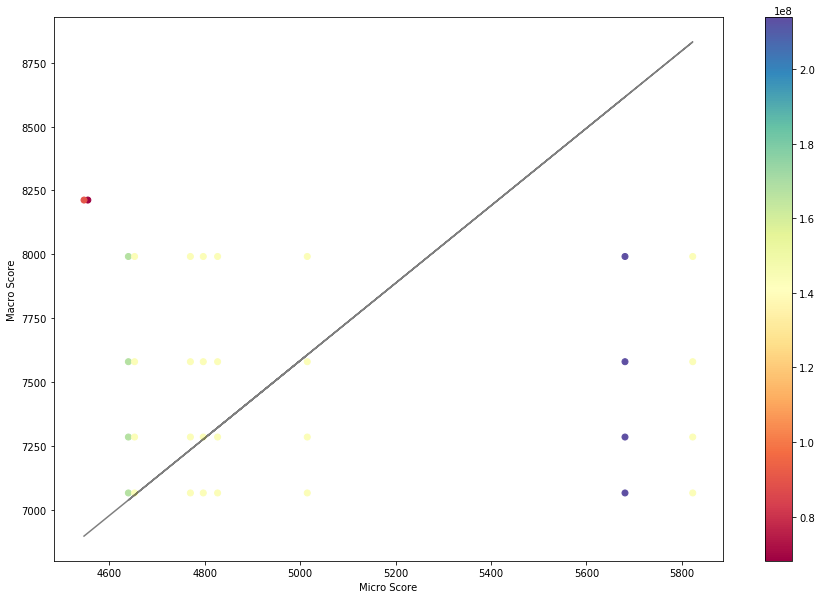

NameError: name 'corr_plot' is not defined

In [11]:
r,e = 2,8
df=process(pp_dfs[namer(r,e)],inspect='micro_mem_size')
corr_plot(df)
style_df(df)

In [ ]:
for i in df:

## Models

Features: ['_micro_score', 'macro_lr', 'macro_params', 'macro_scale', 'macro_weight_decay', 'micro_lr', 'micro_params', 'micro_weight_decay', 'nodes', 'non_identities', 'operations', 'possible_ops', 'density', 'non_identity_density', 'non_identity_params', 'concats', 'micro_delta', 'micro_first', 'micro_parallel', 'micro_step', 'micro_efficiency', 'micro_lr_upper', 'micro_lr_lower', 'micro_mean_step_size', 'micro_mean_step_ratio', 'micro_size_adjusted_score', 'macro_cells', 'macro_spacing', 'macro_parallel', 'macro_lr_upper', 'macro_lr_lower', 'step_efficiency', 'param_scale']
Train Size: 115 Test Size: 52
X Dim: (33,)
RMSE:        2454.4982
C95:         3849.6
Spearman:    -0.402
Predictions: 7076, 7125, 7116, 7312, 7364, 7090, 5292, 7785, 7757, 5924, 7494, 7494, 5924, 5953, 4329, 5924, 7090, 4423, 4329, 6570, 7583, 5387, 7166, 4423, 7166, 4423, 6580, 7594, 4329, 6108, 6118, 7056, 6434, 7240, 6163, 7384, 7373, 7372, 7672, 8206, 7197, 7188, 8631, 8632, 8649, 8633, 7846, 7911, 7829, 780

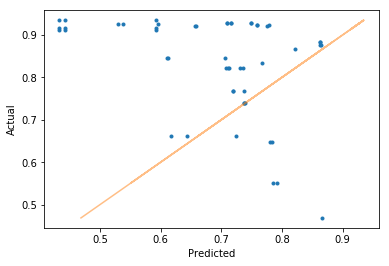

_macro_score                 1.000000
_micro_score                 0.672388
macro_lr                     0.252873
macro_params                 0.312147
macro_scale                 -0.051069
macro_weight_decay           0.252873
matrix_id                    0.014864
micro_lr                     0.072881
micro_params                 0.193557
micro_weight_decay           0.072881
nodes                        0.345040
non_identities               0.344052
operations                   0.266123
possible_ops                 0.280426
density                     -0.421469
non_identity_density         0.773232
non_identity_params          0.435752
concats                      0.140039
micro_delta                  0.324074
micro_first                  0.126208
micro_parallel              -0.096795
micro_step                   0.189538
micro_efficiency             0.286950
micro_lr_upper              -0.085836
micro_lr_lower              -0.101976
ref_micro_days_ago          -0.111179
micro_mean_s

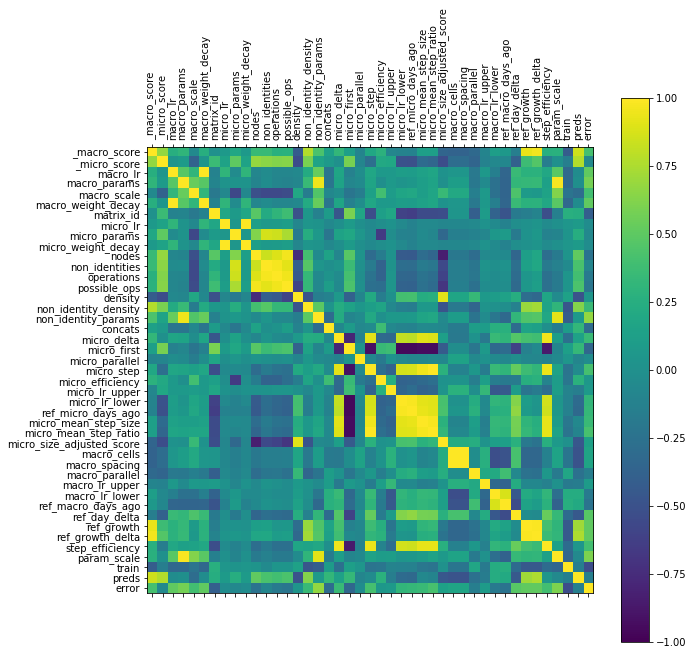

In [583]:
raw_test = xgb_train(df)
corr_plot(raw_test)
style_df(raw_test,inspect='error')

# : 2 Reductions, 32 Epochs

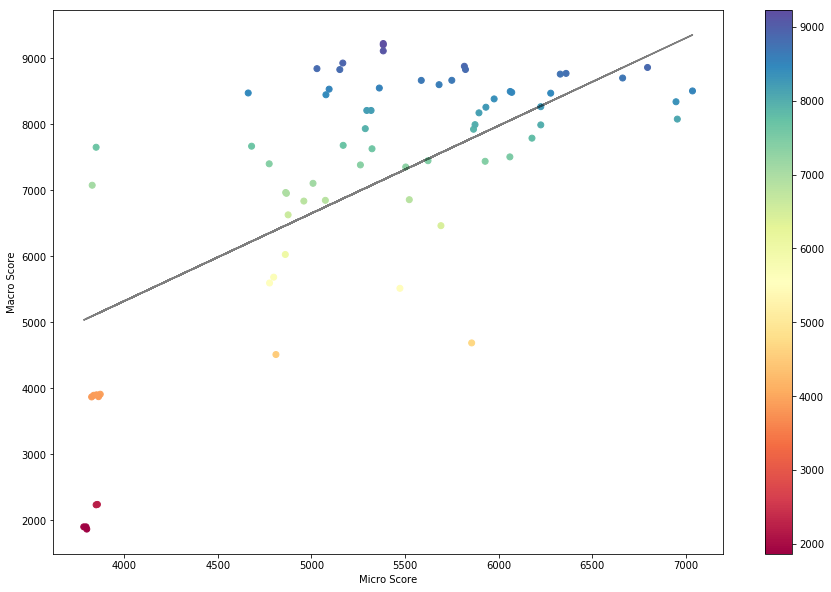

_macro_score            1.000000
_micro_score            0.719323
macro_params            0.054754
macro_scale            -0.173909
matrix_id               0.021051
micro_params            0.219127
nodes                   0.367232
non_identities          0.322556
operations              0.299276
possible_ops            0.309088
density                -0.256826
non_identity_density    0.438764
concats                 0.120455
micro_delta             0.624644
micro_first             0.687639
micro_parallel         -0.193269
micro_step              0.593455
micro_efficiency        0.247577
ref_micro_days_ago     -0.020674
macro_cells            -0.376771
macro_spacing          -0.376771
macro_parallel         -0.065429
macro_lr_upper         -0.108069
macro_lr_lower          0.091138
ref_macro_days_ago      0.174475
ref_day_delta          -0.175555
ref_growth              0.855540
ref_growth_delta        0.916173
step_efficiency         0.604663
param_scale            -0.019738
Name: _mac

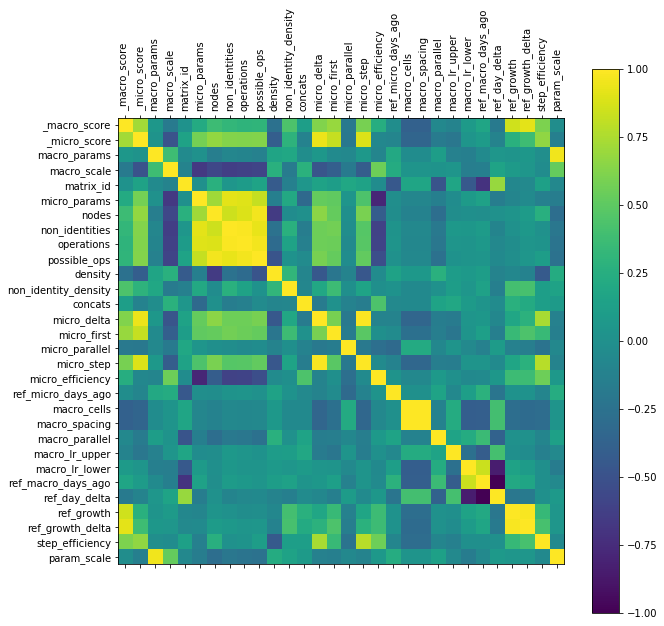

In [250]:
r,e=(2,32)
df=process(pp_dfs[namer(r,e)])
corr_plot(df)
style_df(df)

## Models

Features: ['_micro_score', 'macro_params', 'macro_scale', 'micro_params', 'nodes', 'non_identities', 'operations', 'possible_ops', 'density', 'non_identity_density', 'concats', 'micro_delta', 'micro_first', 'micro_parallel', 'micro_step', 'micro_efficiency', 'macro_cells', 'macro_spacing', 'macro_parallel', 'macro_lr_upper', 'macro_lr_lower', 'step_efficiency', 'param_scale']
Train Size: 56 Test Size: 15
X Dim: (23,)
RMSE:        898.1423
C95:         1756.0
Spearman:    0.661
Predictions: 7960, 8320, 8186, 8215, 4205, 4604, 8417, 8039, 6015, 7292, 6678, 7678, 7497, 8049, 8034,
Test Values: 7441, 7993, 8269, 8081, 3909, 3867, 8704, 8774, 5596, 7997, 3872, 7936, 8477, 8474, 8864,
Pred Ranks:  [6, 1, 3, 2, 13, 7, 14, 0, 11, 12, 9, 10, 8, 5, 4]
Test Ranks:  [14, 7, 6, 12, 13, 2, 3, 9, 1, 11, 0, 8, 4, 10, 5]
Top-1 Match: 0
Top-3 Match: 1
Top-5 Match: 2


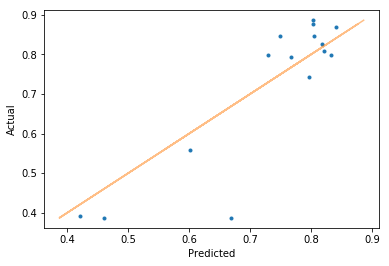

_macro_score            1.000000
_micro_score            0.871559
macro_params           -0.523343
macro_scale            -0.435898
matrix_id               0.163053
micro_params            0.376251
nodes                   0.644564
non_identities          0.432996
operations              0.464366
possible_ops            0.475586
density                -0.594353
non_identity_density   -0.036950
concats                -0.241802
micro_delta             0.835390
micro_first             0.688564
micro_parallel               NaN
micro_step              0.818605
micro_efficiency        0.067609
ref_micro_days_ago     -0.434976
macro_cells            -0.429725
macro_spacing          -0.429725
macro_parallel         -0.407905
macro_lr_upper         -0.195576
macro_lr_lower          0.129172
ref_macro_days_ago      0.118710
ref_day_delta          -0.150421
ref_growth              0.734994
ref_growth_delta        0.862838
step_efficiency         0.786212
param_scale            -0.706738
preds     

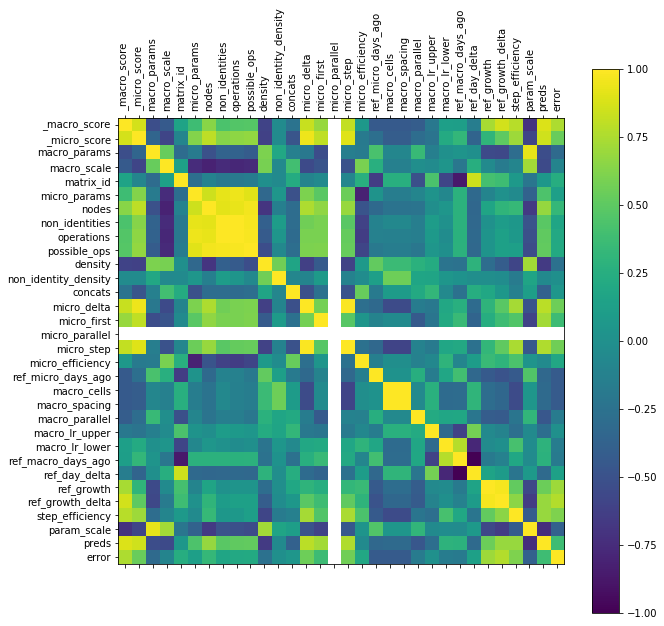

In [251]:
raw_test = xgb_train(df)
corr_plot(raw_test)
style_df(raw_test,inspect='error')

# : 5 Reductions, 8 Epochs

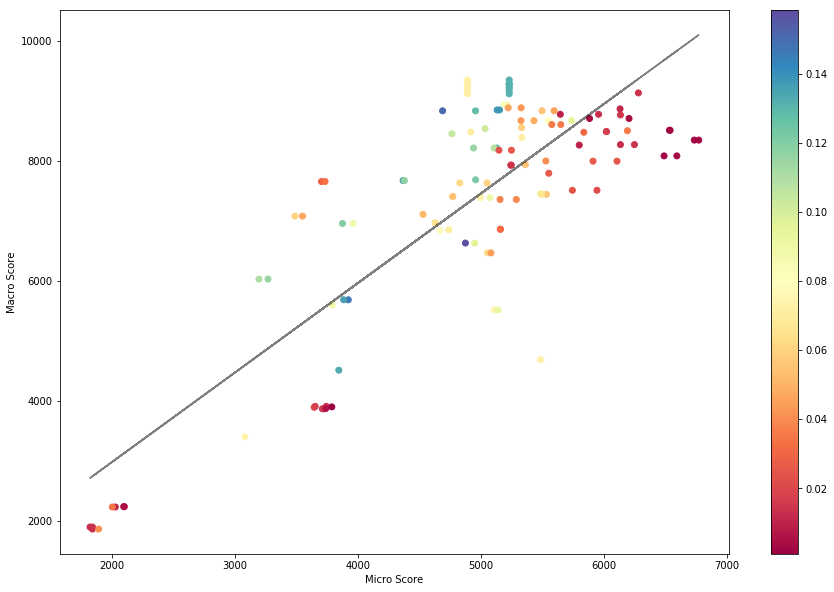

_macro_score                 1.000000
_micro_score                 0.806926
macro_drop_path             -0.271058
macro_lr                     0.236654
macro_params                 0.252510
macro_scale                 -0.027239
macro_weight_decay           0.236654
matrix_id                   -0.210669
micro_lr                     0.080812
micro_params                 0.176682
micro_weight_decay           0.080812
nodes                        0.246294
non_identities               0.260584
operations                   0.216091
possible_ops                 0.215970
density                     -0.182259
non_identity_density         0.629827
non_identity_params          0.360550
concats                      0.003903
micro_delta                  0.722367
micro_first                  0.710579
micro_parallel              -0.155456
micro_step                   0.619000
micro_efficiency            -0.106355
ref_micro_days_ago           0.011440
micro_mean_step_size         0.724632
micro_mean_s

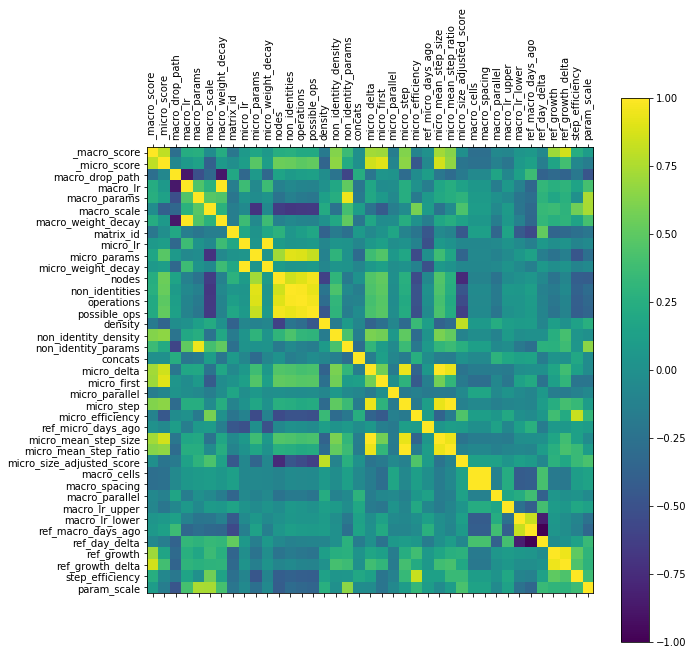

In [585]:
r,e=5,8
df=process(pp_dfs[namer(r,e)],inspect='step_efficiency')
corr_plot(df)
style_df(df,inspect='_micro_score')

## Models

Features: ['_micro_score', 'macro_params', 'macro_scale', 'micro_params', 'nodes', 'non_identities', 'operations', 'possible_ops', 'density', 'non_identity_density', 'concats', 'micro_delta', 'micro_first', 'micro_parallel', 'micro_step', 'micro_efficiency', 'macro_cells', 'macro_spacing', 'macro_parallel', 'macro_lr_upper', 'macro_lr_lower', 'step_efficiency', 'param_scale']
Train Size: 92 Test Size: 23
X Dim: (23,)
RMSE:        1258.5999
C95:         2297.4
Spearman:    0.700
Predictions: 7869, 7795, 8522, 8336, 8350, 8507, 8266, 8423, 6941, 4242, 3821, 7475, 8257, 8345, 8290, 8165, 6877, 7317, 7022, 7874, 8395, 8312, 8425,
Test Values: 7441, 7441, 7993, 7993, 8269, 8269, 8081, 8081, 3909, 3909, 3867, 3867, 8704, 8704, 8774, 8774, 5596, 7997, 3872, 7936, 8477, 8474, 8864,
Pred Ranks:  [2, 5, 22, 7, 20, 4, 13, 3, 21, 14, 6, 12, 15, 19, 0, 1, 11, 17, 18, 8, 16, 9, 10]
Test Ranks:  [22, 14, 15, 12, 13, 20, 21, 4, 5, 6, 7, 17, 2, 3, 19, 0, 1, 16, 8, 9, 18, 10, 11]
Top-1 Match: 0
Top-3 Ma

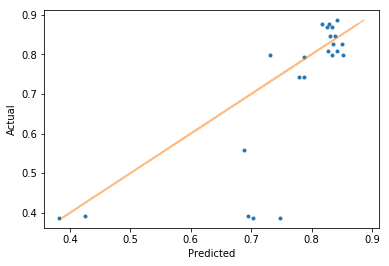

_macro_score            1.000000
_micro_score            0.824393
macro_params            0.102610
macro_scale            -0.142692
matrix_id              -0.066712
micro_params            0.211464
nodes                   0.332331
non_identities          0.302539
operations              0.277563
possible_ops            0.283876
density                -0.213714
non_identity_density    0.405511
concats                 0.104285
micro_delta             0.721605
micro_first             0.776884
micro_parallel         -0.158465
micro_step              0.620781
micro_efficiency       -0.108724
ref_micro_days_ago      0.055970
macro_cells            -0.343158
macro_spacing          -0.343158
macro_parallel         -0.021139
macro_lr_upper         -0.111490
macro_lr_lower          0.083121
ref_macro_days_ago      0.198423
ref_day_delta          -0.200830
ref_growth              0.671219
ref_growth_delta        0.847102
step_efficiency         0.203891
param_scale            -0.056737
train     

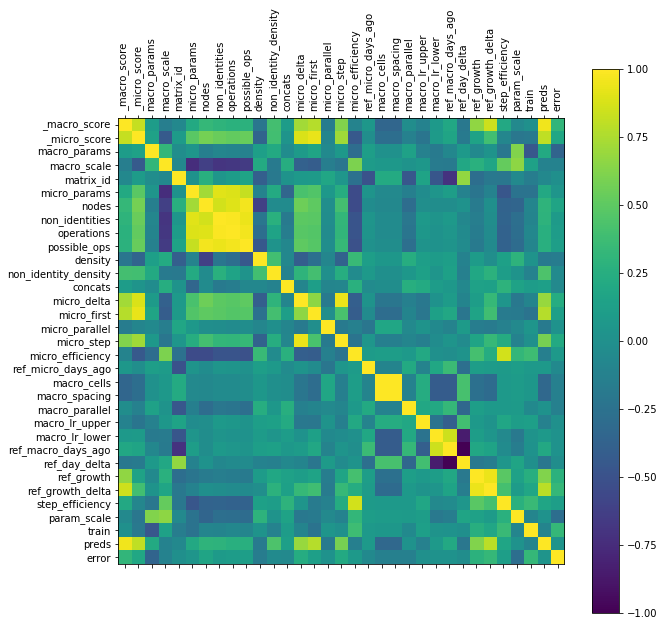

In [307]:
raw_test = xgb_train(df)
corr_plot(raw_test)
style_df(raw_test,inspect='error')

In [311]:
nn_train(df,size=256)

Features: ['_micro_score', 'macro_params', 'macro_scale', 'micro_params', 'nodes', 'non_identities', 'operations', 'possible_ops', 'density', 'non_identity_density', 'concats', 'micro_delta', 'micro_first', 'micro_parallel', 'micro_step', 'micro_efficiency', 'macro_cells', 'macro_spacing', 'macro_parallel', 'macro_lr_upper', 'macro_lr_lower', 'step_efficiency', 'param_scale']
Train Size: 92 Test Size: 23
X Dim: torch.Size([23])

=== EPOCH 0 ===
RMSE:        1493.4293
C95:         2586.4
Spearman:    0.450
Predictions: 8307, 8361, 8965, 8929, 8725, 8803, 9547, 9505, 6046, 6134, 6391, 6481, 8816, 8957, 8374, 8025, 9480, 6765, 4000, 7288, 6963, 7992, 8511,
Test Values: 7440, 7440, 7993, 7993, 8269, 8269, 8080, 8080, 3908, 3908, 3867, 3867, 8704, 8704, 8773, 8773, 5595, 7997, 3871, 7936, 8476, 8474, 8863,
Pred Ranks:  [6, 7, 16, 2, 13, 3, 12, 5, 4, 22, 14, 1, 0, 15, 21, 19, 20, 17, 11, 10, 9, 8, 18]
Test Ranks:  [22, 14, 15, 12, 13, 20, 21, 4, 5, 6, 7, 17, 2, 3, 19, 0, 1, 16, 8, 9, 18, 10,


=== EPOCH 1300 ===
RMSE:        1697.0096
C95:         3138.6
Spearman:    0.430
Predictions: 7679, 7562, 8338, 8251, 8247, 8295, 8347, 8354, 6960, 7210, 7079, 6974, 8274, 8382, 7825, 7968, 9766, 7842, 5163, 7425, 6875, 7541, 7847,
Test Values: 7440, 7440, 7993, 7993, 8269, 8269, 8080, 8080, 3908, 3908, 3867, 3867, 8704, 8704, 8773, 8773, 5595, 7997, 3871, 7936, 8476, 8474, 8863,
Pred Ranks:  [16, 13, 7, 6, 2, 5, 12, 3, 4, 15, 22, 17, 14, 0, 1, 21, 19, 9, 10, 11, 8, 20, 18]
Test Ranks:  [22, 14, 15, 12, 13, 20, 21, 4, 5, 6, 7, 17, 2, 3, 19, 0, 1, 16, 8, 9, 18, 10, 11]
Top-1 Match: 0
Top-3 Match: 0
Top-5 Match: 1

=== EPOCH 1400 ===
RMSE:        1570.4977
C95:         2949.6
Spearman:    0.481
Predictions: 7610, 7497, 8224, 8164, 8146, 8182, 8289, 8287, 6597, 6914, 6648, 6551, 8212, 8317, 7785, 7895, 9691, 7842, 5068, 7495, 6767, 7610, 7823,
Test Values: 7440, 7440, 7993, 7993, 8269, 8269, 8080, 8080, 3908, 3908, 3867, 3867, 8704, 8704, 8773, 8773, 5595, 7997, 3871, 7936, 8476, 8474, 8